In [3]:
import numpy as np
import struct

In [17]:
file_path = "./storage/32C79BE_save_signal.csv"
sample_size = 8
with open(file_path, 'rb') as f:
    # Read the size of the deque vector from the file
    size_bytes = f.read(8)  # Assuming size_t is 8 bytes in C++
    deque_size = struct.unpack('Q', size_bytes)[0]  # Unpack as unsigned long long

    # Read each complex number from the file
    complex_data = []
    for _ in range(deque_size):
        real_bytes = f.read(4)  # Assuming float is 4 bytes in C++
        imag_bytes = f.read(4)  # Assuming float is 4 bytes in C++
        real = struct.unpack('f', real_bytes)[0]  # Unpack as float
        imag = struct.unpack('f', imag_bytes)[0]  # Unpack as float
        complex_data.append(complex(real, imag))

num_samples = len(complex_data)
print(num_samples)

2570


In [10]:
# Unpack the binary data into complex numbers
samples = []
for i in range(num_samples):
    # Extract real and imaginary parts from the binary data
    real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
    # Create a complex number and append it to the list of samples
    samples.append(complex(real_part, imag_part))

samples = np.array(samples)
samples.shape

(2570,)

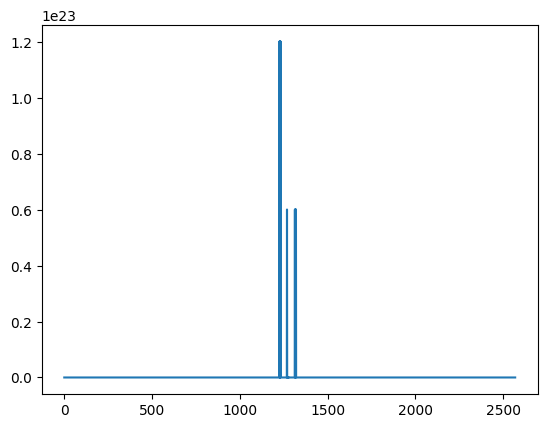

In [18]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

In [12]:
N = 257
M = 31
R = 5
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
zfc_seq_rep = np.tile(zfc_seq, R)
print(zfc_seq.shape)
print(zfc_seq_rep.shape)

(257,)
(1285,)


In [13]:
corr_zfc = np.correlate(samples, zfc_seq, mode='valid')

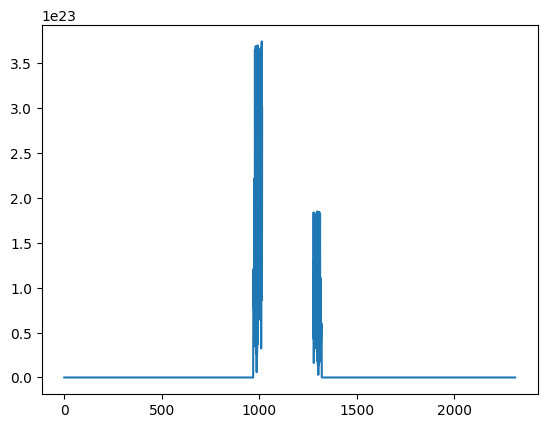

In [14]:
plt.plot(np.abs(corr_zfc))